In [1]:
import pickle as pkl
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import matplotlib
new_cmap = sns.color_palette("BuPu", as_cmap=True)
cols = [new_cmap(80), new_cmap(130), new_cmap(170), new_cmap(220)]
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams['font.size'] = "7"

In [4]:
# os.chdir("../../../Desktop/GDrive/opto_data")
os.chdir("G:\My Drive\opto_data")
# os.chdir("D://gdrive/opto_data/final")

In [5]:
# data = pkl.load(open("20sec_processed_optodata_withshort_5aug20.pkl", "rb"))
data = pkl.load(open("final/20sec_processed_optodata_windexing_20jan21.pkl", "rb"))
cdata = pkl.load(open("processed_control_optodata_25may20.pkl", "rb"))

In [6]:
cdata["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
       'MonkeyJ_20160624_Session2_S1', 'MonkeyJ_20160625_Session2_S1'],
      dtype=object)

In [7]:
data["theta"].columns

Index(['index', 'Initial_coh', 'Distance', 'Coh_proj', 'Phase',
       'Pair_avg_net_coh', 'Elec_cov', 'Time_cov', 'Avg_coh_to_stim',
       'Monkeys', 'Block_num', 'Delays', 'Both_M1', 'Both_S1',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further', 'Coh_diff_mag',
       'End_diff', 'cond_diff_Y', 'diff_Y', 'Experiment_block_key',
       'From_electrodes', 'To_electrodes', 'Is_stim_site_1', 'Is_stim_site_2'],
      dtype='object')

In [8]:
data["theta"]["Initial_coh"].describe()

count    481505.000000
mean          0.469527
std           0.318252
min           0.036510
25%           0.154577
50%           0.433971
75%           0.770143
max           0.999921
Name: Initial_coh, dtype: float64

In [9]:
for band in data.keys():
    print(band)
    print(data[band]["Initial_coh"].describe())
    print()

theta
count    481505.000000
mean          0.469527
std           0.318252
min           0.036510
25%           0.154577
50%           0.433971
75%           0.770143
max           0.999921
Name: Initial_coh, dtype: float64

beta
count    481505.000000
mean          0.496408
std           0.315014
min           0.037351
25%           0.184508
50%           0.492415
75%           0.792288
max           0.999763
Name: Initial_coh, dtype: float64

gamma
count    481505.000000
mean          0.372149
std           0.279903
min           0.047936
25%           0.112372
50%           0.297544
75%           0.600987
max           0.999288
Name: Initial_coh, dtype: float64

high_gamma
count    481505.000000
mean          0.239447
std           0.207377
min           0.050609
25%           0.072408
50%           0.157245
75%           0.342888
max           0.999358
Name: Initial_coh, dtype: float64



In [26]:
for band in data.keys():
    print(band)
    print(data[band]["diff_Y"].describe())
    print(data[band]["diff_Y"].skew())
    print()

theta
count    481505.000000
mean          0.007028
std           0.115452
min          -0.841680
25%          -0.029630
50%           0.001373
75%           0.043303
max           0.833006
Name: diff_Y, dtype: float64
0.46353440815968777

beta
count    481505.000000
mean          0.001000
std           0.075877
min          -0.782795
25%          -0.019849
50%          -0.000383
75%           0.020823
max           0.851702
Name: diff_Y, dtype: float64
-0.46227970230330573

gamma
count    481505.000000
mean         -0.002491
std           0.067498
min          -0.727688
25%          -0.021917
50%          -0.001990
75%           0.012400
max           0.822053
Name: diff_Y, dtype: float64
0.25394504479505076

high_gamma
count    481505.000000
mean         -0.003233
std           0.065755
min          -0.725664
25%          -0.022091
50%          -0.001310
75%           0.010172
max           0.768107
Name: diff_Y, dtype: float64
0.21985274249949877



In [27]:
for band in data.keys():
    print(band)
    print(data[band]["cond_diff_Y"].describe())
    print(data[band]["cond_diff_Y"].skew())
    print()

theta
count    481505.000000
mean          0.012963
std           0.081463
min          -0.744258
25%          -0.017059
50%           0.004029
75%           0.039203
max           0.615191
Name: cond_diff_Y, dtype: float64
0.4039618889590817

beta
count    481505.000000
mean          0.008882
std           0.056066
min          -0.613159
25%          -0.009708
50%           0.002481
75%           0.023825
max           0.658170
Name: cond_diff_Y, dtype: float64
0.902856557097689

gamma
count    481505.000000
mean          0.003429
std           0.052647
min          -0.696614
25%          -0.012916
50%           0.000555
75%           0.017819
max           0.633543
Name: cond_diff_Y, dtype: float64
-0.08821729430724373

high_gamma
count    481505.000000
mean          0.009805
std           0.054933
min          -0.602170
25%          -0.004936
50%           0.001395
75%           0.025185
max           0.601143
Name: cond_diff_Y, dtype: float64
-0.7690333368121526



In [32]:
for band in data.keys():
    print(band)
    print(data[band][["diff_Y", "cond_diff_Y"]].corr())
    print()

theta
               diff_Y  cond_diff_Y
diff_Y       1.000000     0.699754
cond_diff_Y  0.699754     1.000000

beta
               diff_Y  cond_diff_Y
diff_Y       1.000000     0.682475
cond_diff_Y  0.682475     1.000000

gamma
               diff_Y  cond_diff_Y
diff_Y       1.000000     0.655143
cond_diff_Y  0.655143     1.000000

high_gamma
               diff_Y  cond_diff_Y
diff_Y       1.000000     0.617009
cond_diff_Y  0.617009     1.000000



In [10]:
# Get only stim-site data
local_data = {}
for band in data.keys():
    local_data[band] = data[band][(data[band]["Is_stim_site_1"] == 1) & (data[band]["Is_stim_site_2"] == 1)]
#     local_data[band] = data[band][(data[band]["Las1_distance_to_closer"] == 0) & (data[band]["Las2_distance_to_closer"] == 0)]

In [11]:
first_data = {}
# first_cdata = {}
first_local_data = {}

for band in data.keys():
    first_data[band] = data[band][data[band]["Block_num"] == 1].copy()
#     first_cdata[band] = cdata[band][cdata[band]["Block_num"] == 1]
    first_local_data[band] = local_data[band][local_data[band]["Block_num"] == 1].copy()

In [12]:
pandas.set_option('display.max_columns', None)


# General effect of stim

In [11]:
#comparison of raw
for band in data.keys():
    print(band)
    
    # whether raw during stim vs not during stim is different
    print(stats.ttest_ind(data[band]["Initial_coh"], data[band]["Initial_coh"] + data[band]["cond_diff_Y"], equal_var=False))
    print(data[band]["cond_diff_Y"].mean())
    
    # whether beginning vs end is different
    print(stats.ttest_ind(first_data[band]["Initial_coh"], first_data[band]["Initial_coh"] + first_data[band]["End_diff"], equal_var=False))
    print(first_data[band]["End_diff"].mean())
          
    print()

theta
Ttest_indResult(statistic=-20.04802728168134, pvalue=2.1904669457985755e-89)
0.012963412327972452
Ttest_indResult(statistic=-23.871820672754858, pvalue=9.168346154512939e-126)
0.03513820773269578

beta
Ttest_indResult(statistic=-13.874980673129983, pvalue=9.069459826150627e-44)
0.008881709143488702
Ttest_indResult(statistic=-3.4728818345871586, pvalue=0.0005150149613786076)
0.005000639102920437

gamma
Ttest_indResult(statistic=-6.020639738931125, pvalue=1.7379154807475412e-09)
0.003429427161210786
Ttest_indResult(statistic=9.706500060371818, pvalue=2.862317770433813e-22)
-0.012454510664603537

high_gamma
Ttest_indResult(statistic=-23.123688872573673, pvalue=2.8820820126367267e-118)
0.00980497993740196
Ttest_indResult(statistic=16.92667860266802, pvalue=3.185270665472698e-64)
-0.016163281112466173



In [12]:
os.chdir("D:/gdrive/GDocuments/Nature_biomed/figures/submiss_1/fig2")

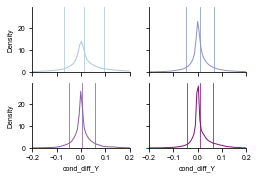

In [39]:
# plot KDEs of distribution of cond_diff regression target
# fig, axs = plt.subplots(2, 2, figsize=(2.5,2), sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2, figsize=(3.6,2.5), sharex=True, sharey=True)

i = 0
for band in data.keys():
#     print(band)
    ax = axs[i//2, i%2]
    p=sns.kdeplot(x="cond_diff_Y", data=data[band], fill=False, color=cols[i], ax=ax, alpha=1.5, linewidth=1)
#     print(data[band]["cond_diff_Y"].describe())
   

    ax.axvline(x=data[band]["cond_diff_Y"].mean(), color=cols[i], linewidth=.75)
    ax.axvline(x=data[band]["cond_diff_Y"].mean()+data[band]["cond_diff_Y"].std(), color=cols[i], linewidth=.75)
    ax.axvline(x=data[band]["cond_diff_Y"].mean()-data[band]["cond_diff_Y"].std(), color=cols[i], linewidth=.75)
#     ax.axvline(x=data[band]["cond_diff_Y"].quantile(.25), color="black", ls='--', linewidth=.75)
#     ax.axvline(x=data[band]["cond_diff_Y"].quantile(.75), color="black", ls='--', linewidth=.75)
    ax.set_xlim([-.2, .2])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     plt.show()
    i += 1
plt.tight_layout()
plt.savefig("cond_diff_distribs.pdf", dpi=100)

In [14]:
break

SyntaxError: 'break' outside loop (<ipython-input-14-6aaf1f276005>, line 1)

In [ ]:
sns.ecdfplot(data = all_bands, x="cond_diff_Y", hue="band", palette=cols)
plt.xlim([-.4, .4])

In [ ]:
for band in data.keys():
    data[band]["band"] = band
all_bands = pandas.concat([data["theta"], data["beta"], data["gamma"], data["high_gamma"]])

In [ ]:
# plot KDEs of distribution of cond_diff regression target
# fig, axs = plt.subplots(2, 2, figsize=(3,2.5), sharex=True, sharey=True)

i = 0
for band in data.keys():
#     print(band)
    p=sns.kdeplot(x="cond_diff_Y", data=data[band], fill=False, color=cols[i], alpha=1.5, linewidth=1)
#     print(data[band]["cond_diff_Y"].describe())
   

#     plt.axvline(x=data[band]["cond_diff_Y"].median(), color="black", linewidth=.75)
#     plt.axvline(x=data[band]["cond_diff_Y"].quantile(.25), color="black", ls='--', linewidth=.75)
#     plt.axvline(x=data[band]["cond_diff_Y"].quantile(.75), color="black", ls='--', linewidth=.75)
#     plt.xlim([-.2, .2])
#     plt.spines['right'].set_visible(False)
#     plt.spines['top'].set_visible(False)
#     plt.show()
    i += 1
plt.tight_layout()
# plt.savefig("cond_diff_distribs.pdf", dpi=100)

In [15]:
for band in data.keys():
    data[band]["band"] = band
all_bands = pandas.concat([data["theta"], data["beta"], data["gamma"], data["high_gamma"]])

<AxesSubplot:xlabel='band', ylabel='cond_diff_Y'>

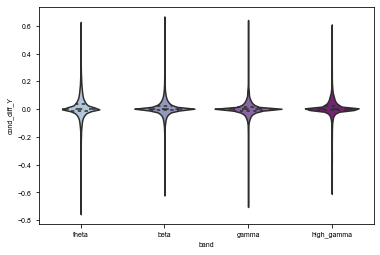

In [16]:
# plot KDEs of distribution of cond_diff regression target
# fig, axs = plt.subplots(2, 2, figsize=(3,2.5), sharex=True, sharey=True)

sns.violinplot(y="cond_diff_Y", x="band", data=all_bands, inner='quartile', palette=cols)

#     plt.show()

# plt.tight_layout()
# plt.savefig("cond_diff_distribs.pdf", dpi=100)

In [ ]:
break

In [17]:
all_repr_data = pandas.DataFrame()
for band in data.keys():
    data[band]["band"] = band
    
    nostim_data = data[band].copy()
    nostim_data["stim"] = "Resting"

    stim_data = data[band].copy()
    stim_data["Initial_coh"] = stim_data["Initial_coh"] + stim_data["cond_diff_Y"]
    stim_data["stim"] = "Stim"
    
    all_repr_data = all_repr_data.append(nostim_data)
    all_repr_data = all_repr_data.append(stim_data)

In [18]:
firstlast_data = pandas.DataFrame()
for band in data.keys():
    first_data[band]["band"] = band
    
    firstrest_data = first_data[band].copy()
    firstrest_data["order"] = "Beginning"

    lastrest_data = first_data[band].copy()
    lastrest_data["Initial_coh"] = lastrest_data["Initial_coh"] + lastrest_data["End_diff"]
    lastrest_data["order"] = "End"
    
    firstlast_data = firstlast_data.append(firstrest_data)
    firstlast_data = firstlast_data.append(lastrest_data)

In [ ]:
os.chdir("D:/gdrive/GDocuments/Nature_biomed/figures")

C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Julien\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


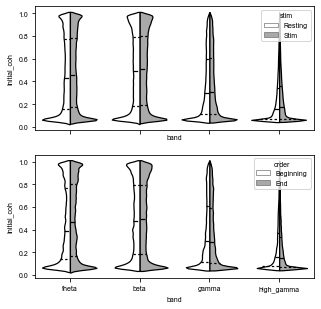

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

# violin plot of stim vs not stim
sns.violinplot("band", "Initial_coh", "stim", all_repr_data, split=True, bw=.04, inner="quartile", palette = ["white", "darkgrey"], linecolor="black", cut=True, linewidth=1.25, ax=axs[0])

# violin plot of first vs last resting state recording
sns.violinplot("band", "Initial_coh", "order", firstlast_data, split=True, bw=.04, inner="quartile", palette = ["white", "darkgrey"], linecolor="black", cut=True, linewidth=1.25, ax=axs[1])

# axs[0].set_ylim([-.02, 1.02])
# axs[1].set_ylim([-.02, 1.02])

# make edges black
for axes in axs:
    for collection in axes.collections:
        collection.set_edgecolor("black")
    for line in axes.lines:
        line.set_color('black')

# plt.savefig("distributions_plot.pdf", dpi=100)

plt.show()


<AxesSubplot:xlabel='band', ylabel='Initial_coh'>

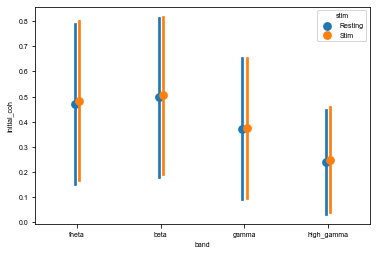

In [29]:
sns.pointplot(x="band", y="Initial_coh", hue="stim", data=all_repr_data, dodge=True, marker='o', linestyles='', err_style='bars', ci='sd')
